In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

%run '/VisionTransformer_256_4_4_slidingwindow.ipynb'
%run '/dataloader_imreshape_change.ipynb'

import numpy as np
import os
import tarfile

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def extract_local_tar(local_tar_path, folder):
    with tarfile.open(local_tar_path, 'r|gz') as tar:
        tar.extractall(path=folder)

def download(folder,thetarfile):
    import urllib.request
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    local_tarfile = "/CERUG-EN-train-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    #download(folder,thetarfile)
    local_tarfile = "/CERUG-EN-test-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    #download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


CERUG-ENCERUG-ENwriter_index_table.pickle
['Writer9797_03-01-line-0-n-1-y-15-x-252-h-117-w-277.png', 'Writer6464_03-01-line-2-n-7-y-387-x-1088-h-85-w-134.png', 'Writer4444_03-01-line-4-n-3-y-627-x-826-h-87-w-109.png', 'Writer7272_03-01-line-0-n-7-y-44-x-1525-h-83-w-119.png', 'Writer2929_03-01-line-3-n-6-y-510-x-1316-h-135-w-156.png', 'Writer7979_03-01-line-6-n-3-y-964-x-1562-h-132-w-379.png', 'Writer3535_03-01-line-0-n-1-y-72-x-553-h-89-w-252.png', 'Writer9104_03-01-line-0-n-5-y-42-x-1186-h-105-w-88.png', 'Writer6464_03-01-line-0-n-9-y-79-x-1766-h-81-w-89.png', 'Writer2525_03-01-line-4-n-1-y-701-x-460-h-94-w-146.png', 'Writer8888_03-01-line-2-n-3-y-375-x-542-h-119-w-113.png', 'Writer6363_03-01-line-3-n-1-y-499-x-316-h-171-w-98.png', 'Writer1212_03-01-line-3-n-8-y-428-x-2101-h-132-w-168.png', 'Writer9999_03-01-line-2-n-9-y-377-x-1473-h-99-w-140.png', 'Writer3636_03-01-line-3-n-0-y-527-x-421-h-107-w-110.png', 'Writer6060_03-01-line-1-n-0-y-214-x-202-h-100-w-237.png', 'Writer5252_03-01-li

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Traing epoch: 0   avg loss is: 4.5069247467511175
Testing epoch: 0   avg testing loss is: 4.25109705969552
Testing on epoch: 0 has accuracy: top1: 2.75 top5: 12.42


<ipython-input-4-2401f812985c>:130: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
<ipython-input-4-2401f812985c>:132: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


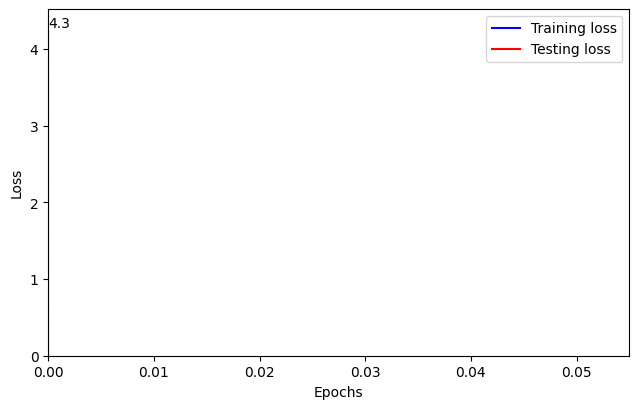

Traing epoch: 1   avg loss is: 4.171063402453725
Testing epoch: 1   avg testing loss is: 4.07421875742737
Testing on epoch: 1 has accuracy: top1: 4.00 top5: 18.39


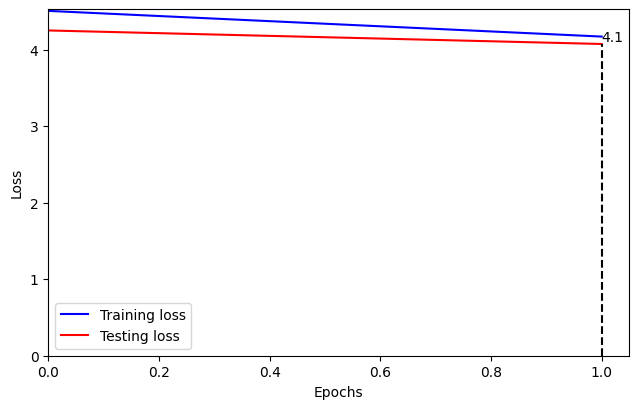

Traing epoch: 2   avg loss is: 4.028261080509474
Testing epoch: 2   avg testing loss is: 3.9642581144968667
Testing on epoch: 2 has accuracy: top1: 5.73 top5: 20.91


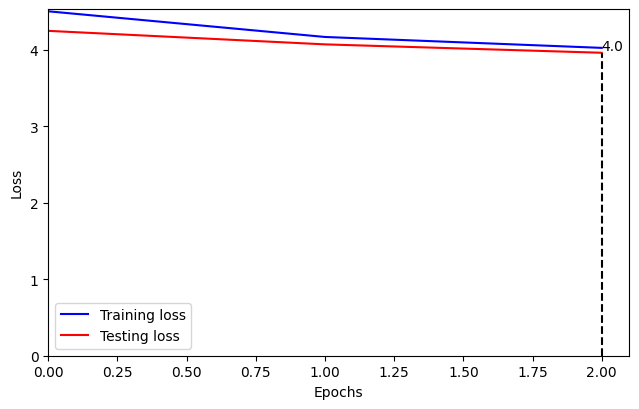

Traing epoch: 3   avg loss is: 3.951947428599125
Testing epoch: 3   avg testing loss is: 3.9072365835076925
Testing on epoch: 3 has accuracy: top1: 5.89 top5: 22.51


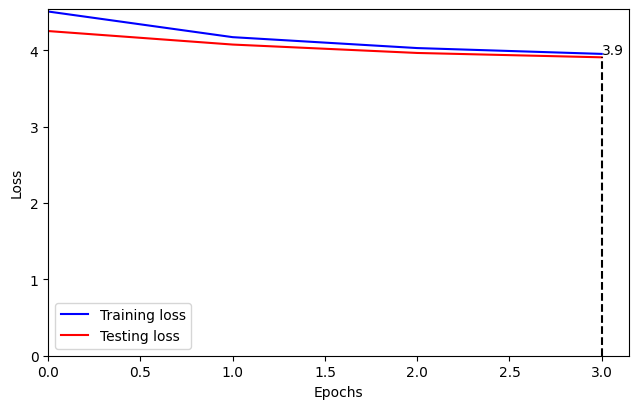

Traing epoch: 4   avg loss is: 3.8673689672592975
Testing epoch: 4   avg testing loss is: 3.7630629702891887
Testing on epoch: 4 has accuracy: top1: 8.31 top5: 33.10


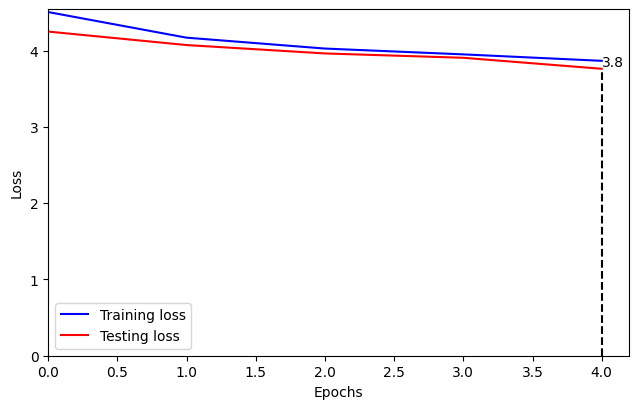

Traing epoch: 5   avg loss is: 3.7269431656482173
Testing epoch: 5   avg testing loss is: 3.6650754959783822
Testing on epoch: 5 has accuracy: top1: 10.14 top5: 36.06


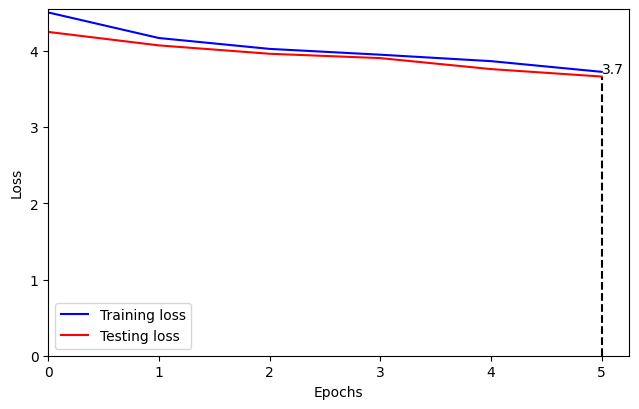

Traing epoch: 6   avg loss is: 3.606446434469784
Testing epoch: 6   avg testing loss is: 3.574993244212736
Testing on epoch: 6 has accuracy: top1: 11.27 top5: 38.99


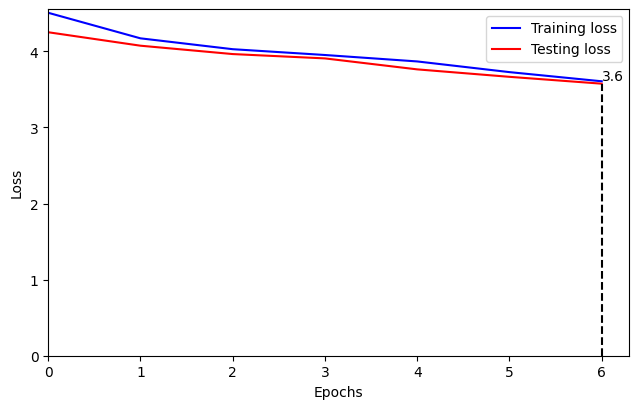

Traing epoch: 7   avg loss is: 3.5223507126506304
Testing epoch: 7   avg testing loss is: 3.5441777238221928
Testing on epoch: 7 has accuracy: top1: 12.87 top5: 40.14


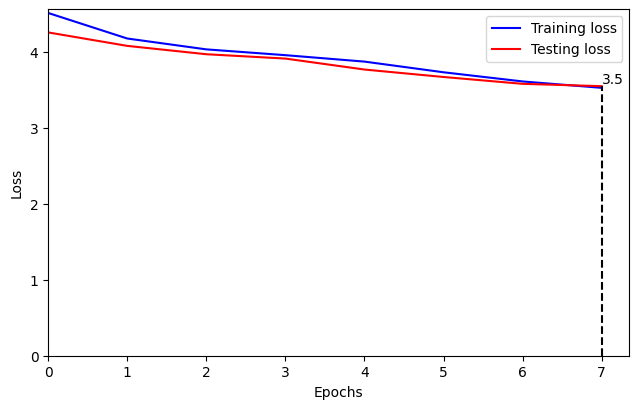

Traing epoch: 8   avg loss is: 3.4488777039097807
Testing epoch: 8   avg testing loss is: 3.456467400458743
Testing on epoch: 8 has accuracy: top1: 12.78 top5: 43.71


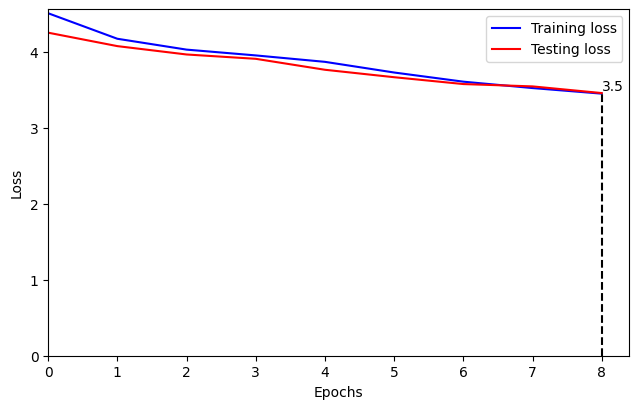

Traing epoch: 9   avg loss is: 3.381819071222086
Testing epoch: 9   avg testing loss is: 3.4149407575434987
Testing on epoch: 9 has accuracy: top1: 14.86 top5: 45.70


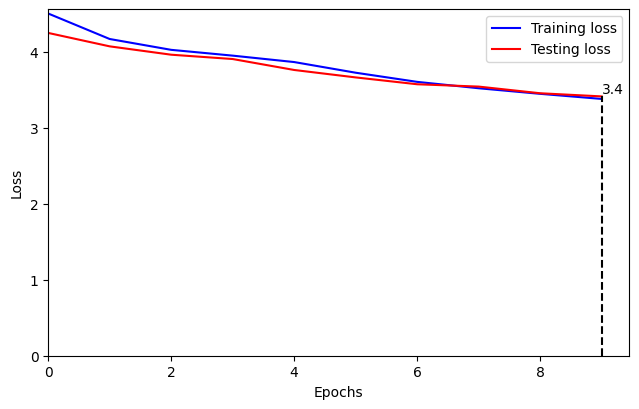

Traing epoch: 10   avg loss is: 3.285112490507067
Testing epoch: 10   avg testing loss is: 3.3167061530912405
Testing on epoch: 10 has accuracy: top1: 18.43 top5: 50.75


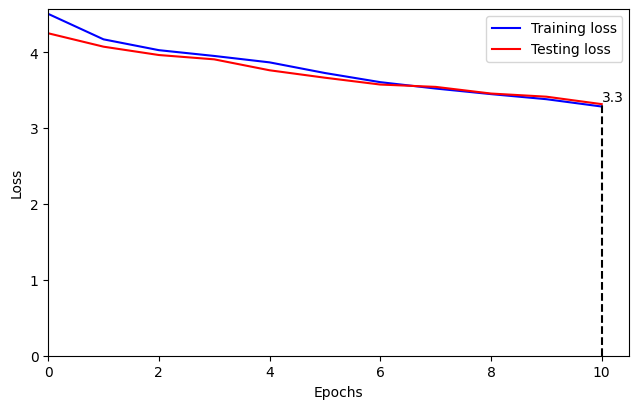

Traing epoch: 11   avg loss is: 3.2421586119494186
Testing epoch: 11   avg testing loss is: 3.2722350176992445
Testing on epoch: 11 has accuracy: top1: 19.89 top5: 54.05


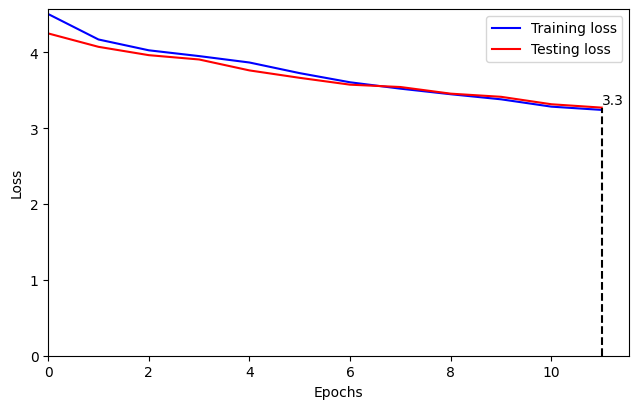

Traing epoch: 12   avg loss is: 3.1991780017938267
Testing epoch: 12   avg testing loss is: 3.2129151843418584
Testing on epoch: 12 has accuracy: top1: 22.24 top5: 57.15


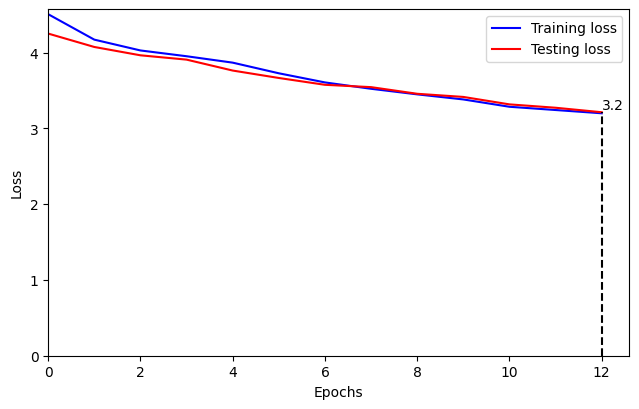

Traing epoch: 13   avg loss is: 3.1522817484804895
Testing epoch: 13   avg testing loss is: 3.1966169088429006
Testing on epoch: 13 has accuracy: top1: 21.16 top5: 57.07


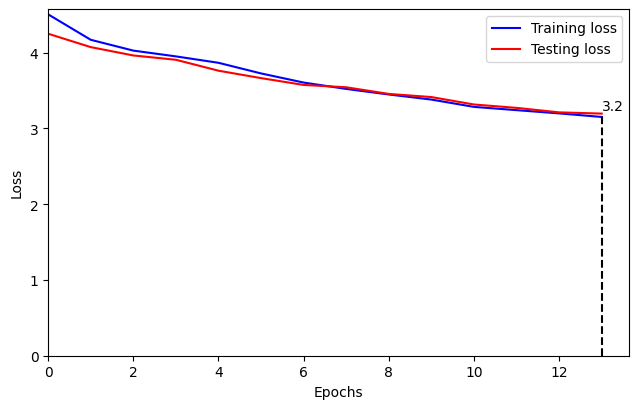

Traing epoch: 14   avg loss is: 3.1111067810646293
Testing epoch: 14   avg testing loss is: 3.1641433528650587
Testing on epoch: 14 has accuracy: top1: 23.89 top5: 59.65


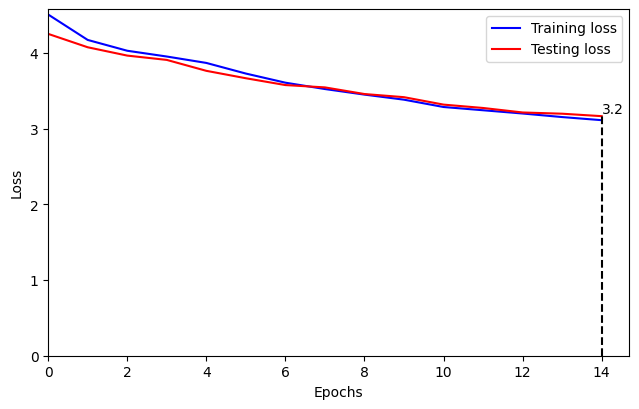

Traing epoch: 15   avg loss is: 3.0537554082416354
Testing epoch: 15   avg testing loss is: 3.1670270812845676
Testing on epoch: 15 has accuracy: top1: 22.20 top5: 57.99


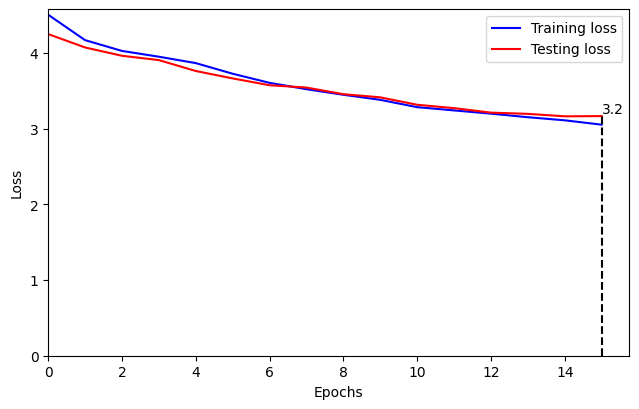

Traing epoch: 16   avg loss is: 3.0154106309767865
Testing epoch: 16   avg testing loss is: 3.1223021199770065
Testing on epoch: 16 has accuracy: top1: 21.67 top5: 60.37


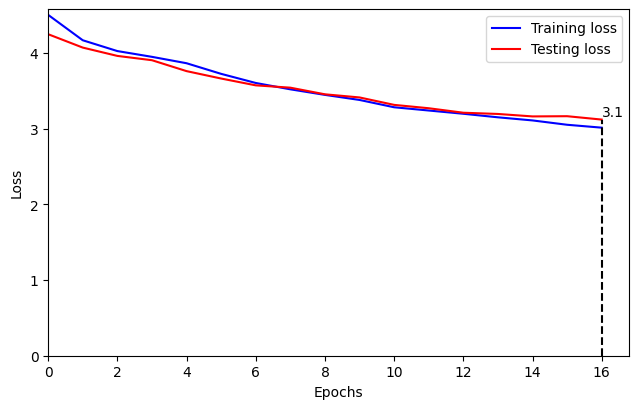

Traing epoch: 17   avg loss is: 2.9721220828571906
Testing epoch: 17   avg testing loss is: 3.1084890068505784
Testing on epoch: 17 has accuracy: top1: 23.35 top5: 60.27


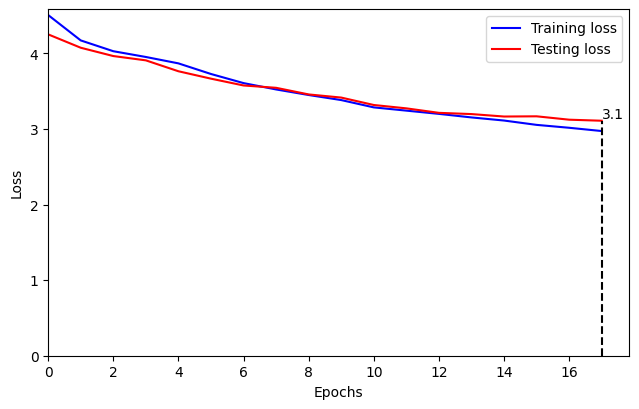

Traing epoch: 18   avg loss is: 2.9317121899762406
Testing epoch: 18   avg testing loss is: 3.04904744112603
Testing on epoch: 18 has accuracy: top1: 27.01 top5: 64.01


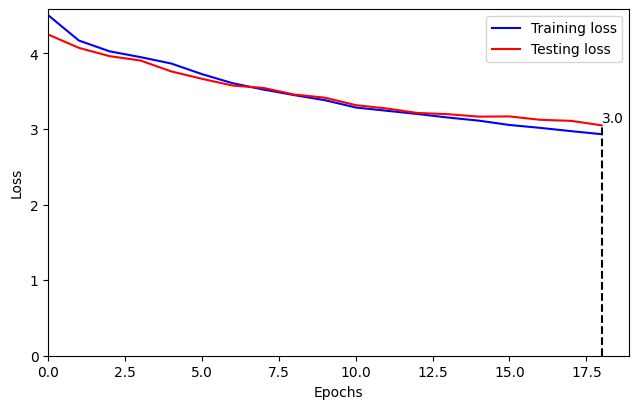

Traing epoch: 19   avg loss is: 2.8937833923585607
Testing epoch: 19   avg testing loss is: 3.120093021066018
Testing on epoch: 19 has accuracy: top1: 21.92 top5: 60.07


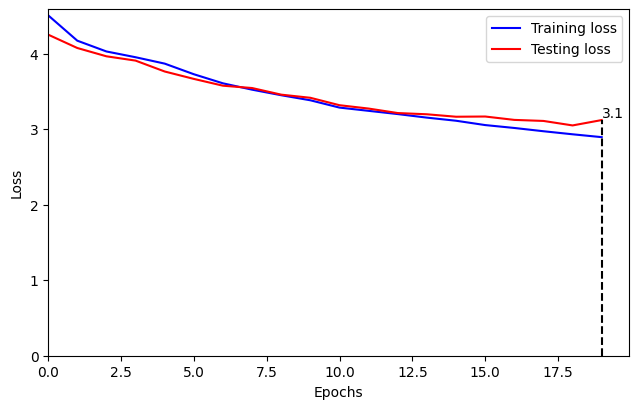

Traing epoch: 20   avg loss is: 2.8343918437049505
Testing epoch: 20   avg testing loss is: 3.0238797672069704
Testing on epoch: 20 has accuracy: top1: 27.05 top5: 64.19


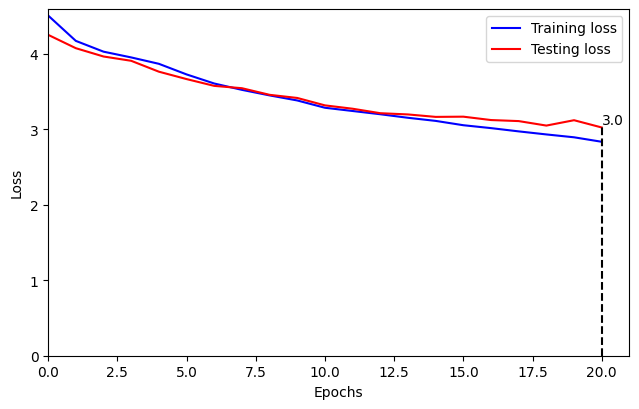

Traing epoch: 21   avg loss is: 2.809920281589198
Testing epoch: 21   avg testing loss is: 3.0032320891585305
Testing on epoch: 21 has accuracy: top1: 28.52 top5: 65.50


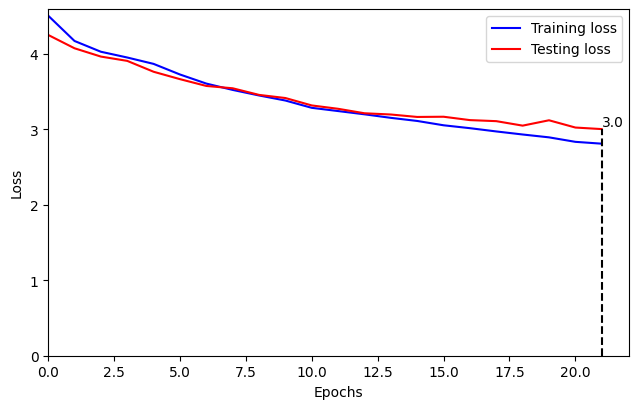

Traing epoch: 22   avg loss is: 2.7923905849456787
Testing epoch: 22   avg testing loss is: 3.025610580622593
Testing on epoch: 22 has accuracy: top1: 25.98 top5: 64.46


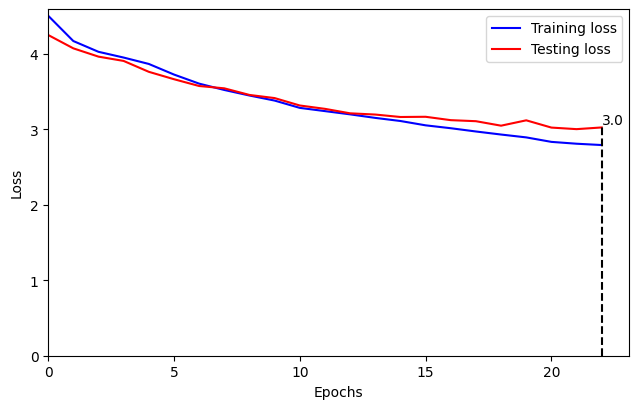

Traing epoch: 23   avg loss is: 2.7719574388669654
Testing epoch: 23   avg testing loss is: 2.974061497275332
Testing on epoch: 23 has accuracy: top1: 28.63 top5: 66.53


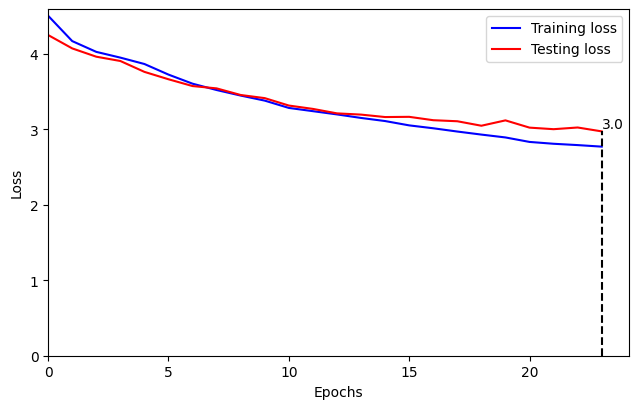

Traing epoch: 24   avg loss is: 2.766657205522895
Testing epoch: 24   avg testing loss is: 3.0284522656711093
Testing on epoch: 24 has accuracy: top1: 26.10 top5: 63.98


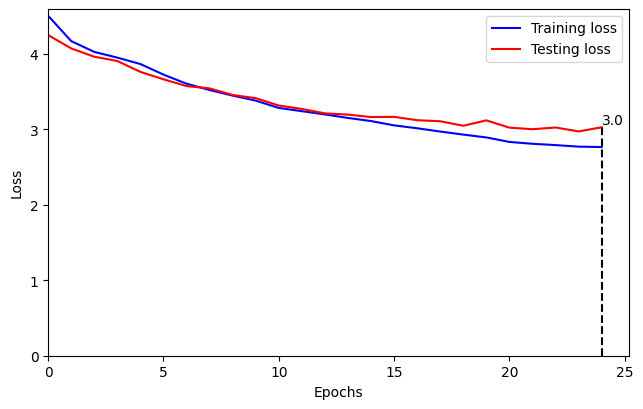

Traing epoch: 25   avg loss is: 2.744561925321734
Testing epoch: 25   avg testing loss is: 3.0094007220223684
Testing on epoch: 25 has accuracy: top1: 27.44 top5: 64.74


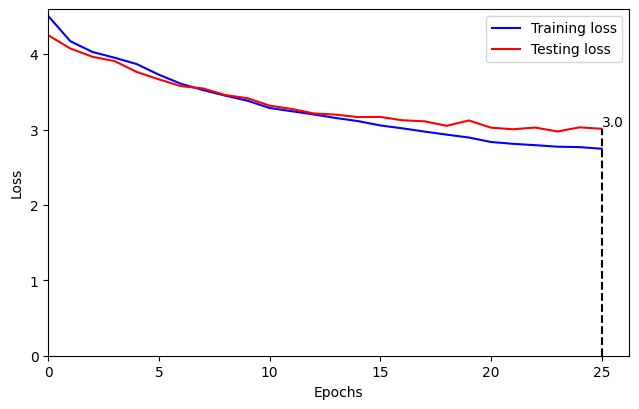

Traing epoch: 26   avg loss is: 2.7333261632785746
Testing epoch: 26   avg testing loss is: 3.018155802818845
Testing on epoch: 26 has accuracy: top1: 27.17 top5: 64.48


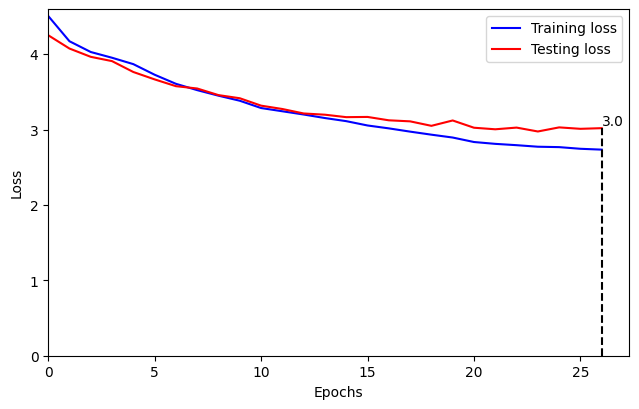

Traing epoch: 27   avg loss is: 2.7243916447423087
Testing epoch: 27   avg testing loss is: 3.0123773594140264
Testing on epoch: 27 has accuracy: top1: 25.80 top5: 64.93


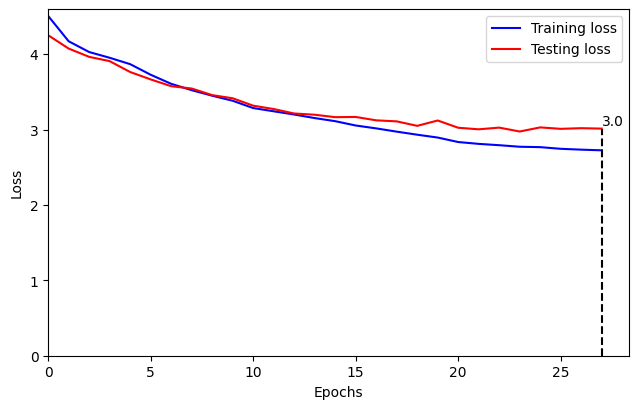

Traing epoch: 28   avg loss is: 2.7126629706524334
Testing epoch: 28   avg testing loss is: 2.9466191340829724
Testing on epoch: 28 has accuracy: top1: 28.57 top5: 67.47


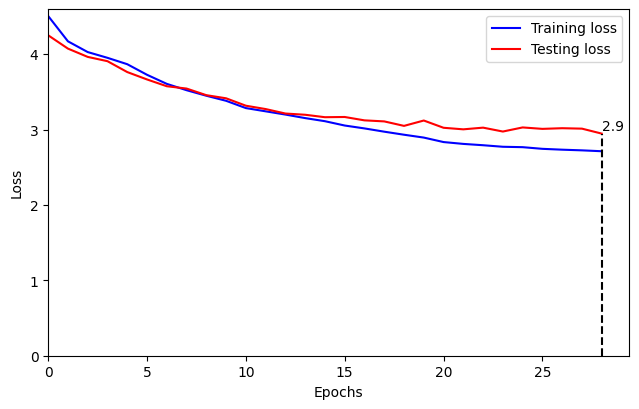

Traing epoch: 29   avg loss is: 2.6839111071674764
Testing epoch: 29   avg testing loss is: 3.064346822994149
Testing on epoch: 29 has accuracy: top1: 24.46 top5: 62.69


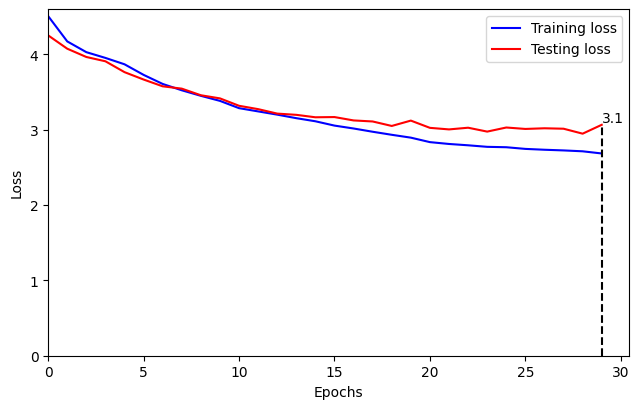

Traing epoch: 30   avg loss is: 2.6508523589756643
Testing epoch: 30   avg testing loss is: 3.0229316025136788
Testing on epoch: 30 has accuracy: top1: 26.57 top5: 63.80


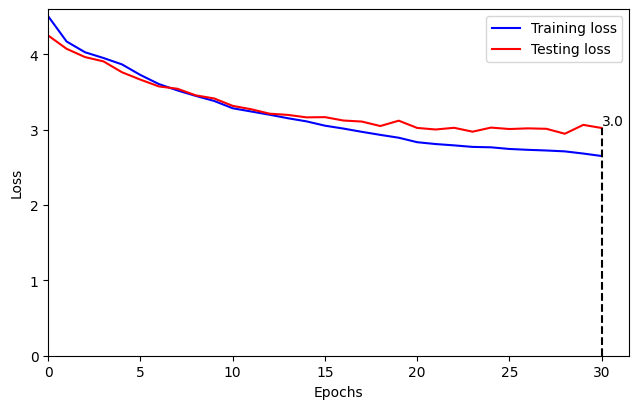

Traing epoch: 31   avg loss is: 2.6556880734547845
Testing epoch: 31   avg testing loss is: 3.0238904262257513
Testing on epoch: 31 has accuracy: top1: 26.76 top5: 64.50


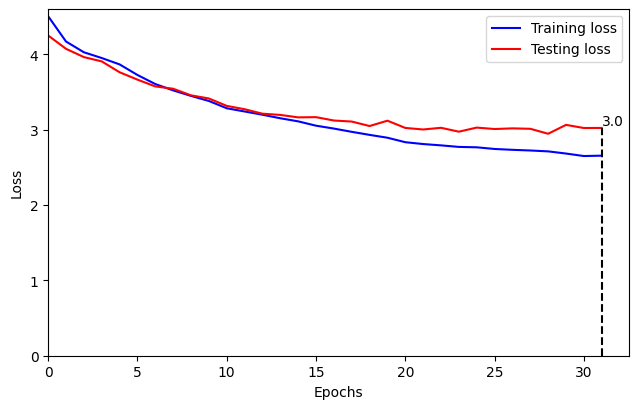

Traing epoch: 32   avg loss is: 2.643903844496783
Testing epoch: 32   avg testing loss is: 2.981815607005562
Testing on epoch: 32 has accuracy: top1: 27.23 top5: 65.65


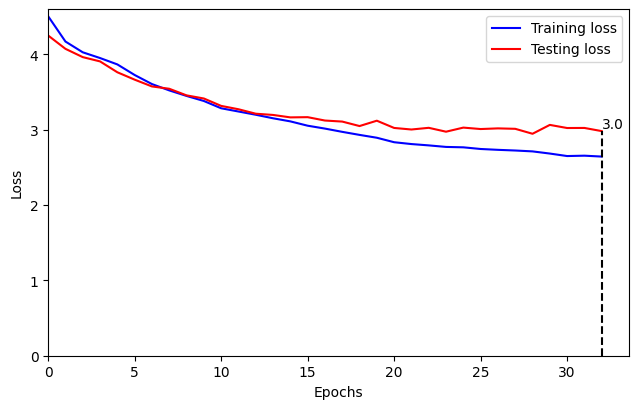

Traing epoch: 33   avg loss is: 2.6346277041929445
Testing epoch: 33   avg testing loss is: 2.974446610869648
Testing on epoch: 33 has accuracy: top1: 27.50 top5: 66.10


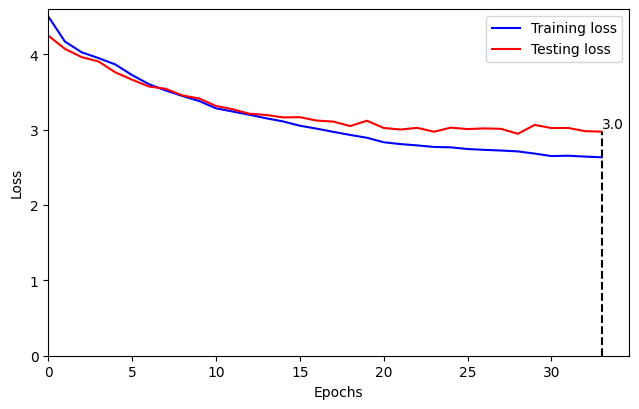

Traing epoch: 34   avg loss is: 2.6346860292578946
Testing epoch: 34   avg testing loss is: 2.9737447184565653
Testing on epoch: 34 has accuracy: top1: 28.28 top5: 66.10


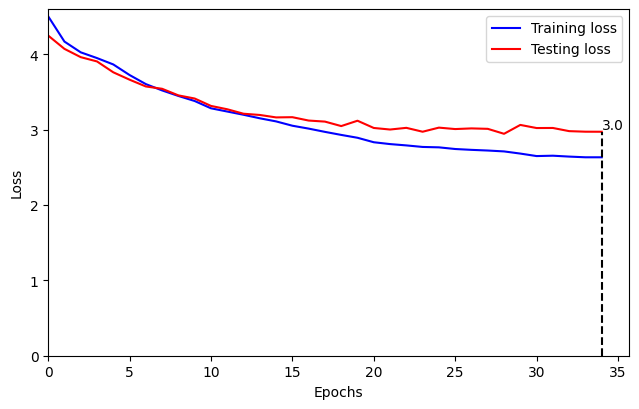

Traing epoch: 35   avg loss is: 2.6261965914600705
Testing epoch: 35   avg testing loss is: 2.9936298455033348
Testing on epoch: 35 has accuracy: top1: 27.79 top5: 65.52


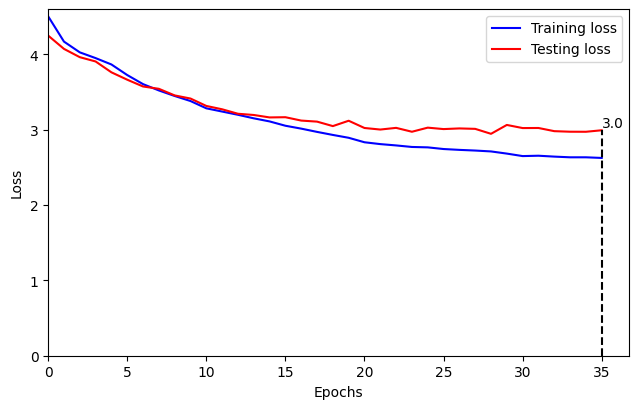

Traing epoch: 36   avg loss is: 2.6195964345745013
Testing epoch: 36   avg testing loss is: 3.0678774746036233
Testing on epoch: 36 has accuracy: top1: 24.69 top5: 62.69


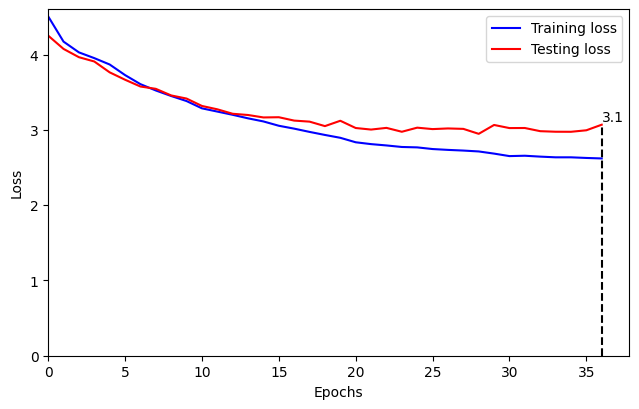

Traing epoch: 37   avg loss is: 2.6147489761438023
Testing epoch: 37   avg testing loss is: 3.0421462393252647
Testing on epoch: 37 has accuracy: top1: 26.02 top5: 63.51


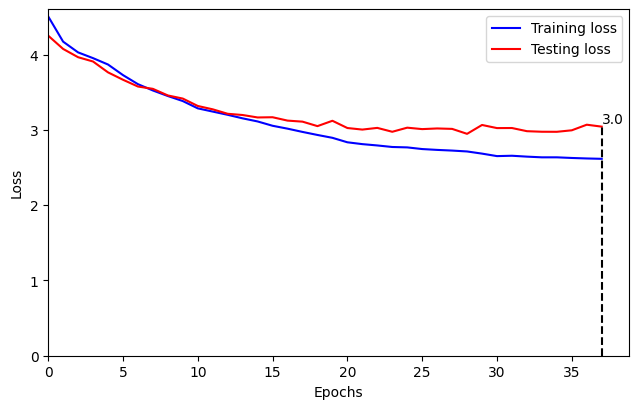

Traing epoch: 38   avg loss is: 2.6021284215590534
Testing epoch: 38   avg testing loss is: 3.0221910848053075
Testing on epoch: 38 has accuracy: top1: 26.02 top5: 64.21


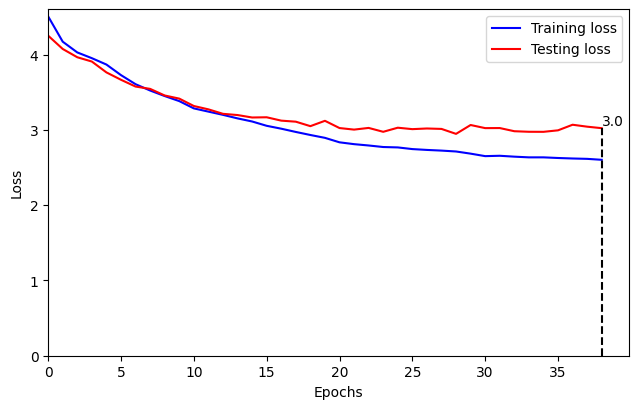

Traing epoch: 39   avg loss is: 2.6008180877407727
Testing epoch: 39   avg testing loss is: 3.0657182296859884
Testing on epoch: 39 has accuracy: top1: 25.41 top5: 62.61


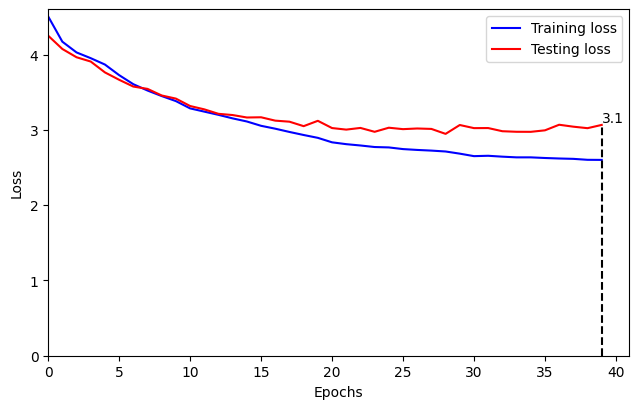

Traing epoch: 40   avg loss is: 2.5844528715149697
Testing epoch: 40   avg testing loss is: 2.9844147260315323
Testing on epoch: 40 has accuracy: top1: 27.31 top5: 66.18


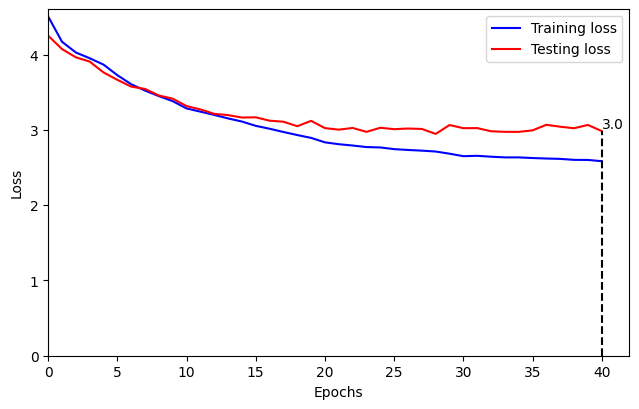

Traing epoch: 41   avg loss is: 2.5785544973795487
Testing epoch: 41   avg testing loss is: 2.9814654221044523
Testing on epoch: 41 has accuracy: top1: 27.44 top5: 66.10


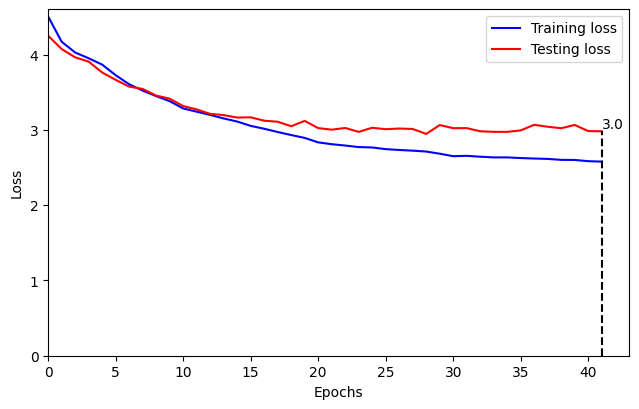

Traing epoch: 42   avg loss is: 2.574571910024691
Testing epoch: 42   avg testing loss is: 3.002316258035345
Testing on epoch: 42 has accuracy: top1: 27.23 top5: 65.22


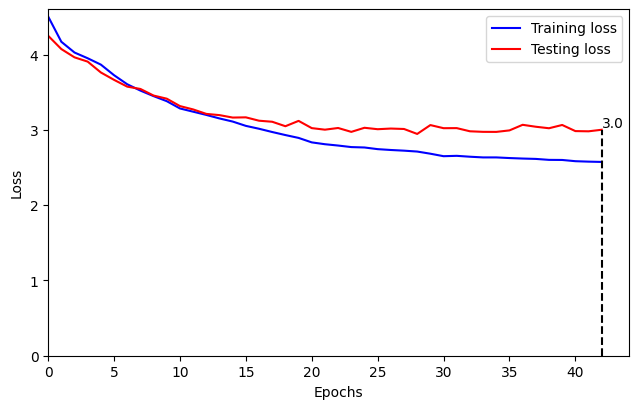

Traing epoch: 43   avg loss is: 2.573407473684359
Testing epoch: 43   avg testing loss is: 2.941657178498503
Testing on epoch: 43 has accuracy: top1: 29.35 top5: 67.43


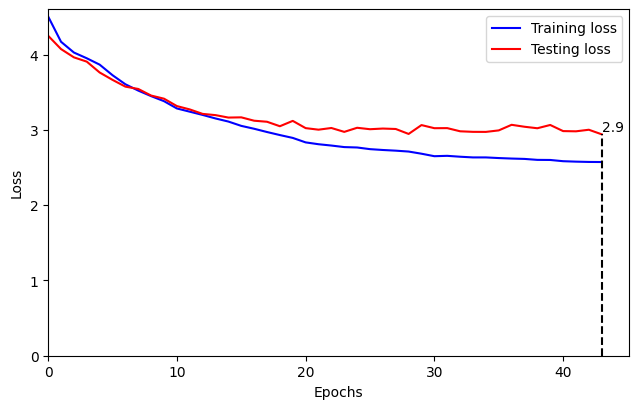

Traing epoch: 44   avg loss is: 2.567341628194857
Testing epoch: 44   avg testing loss is: 3.0151054703186606
Testing on epoch: 44 has accuracy: top1: 27.15 top5: 64.93


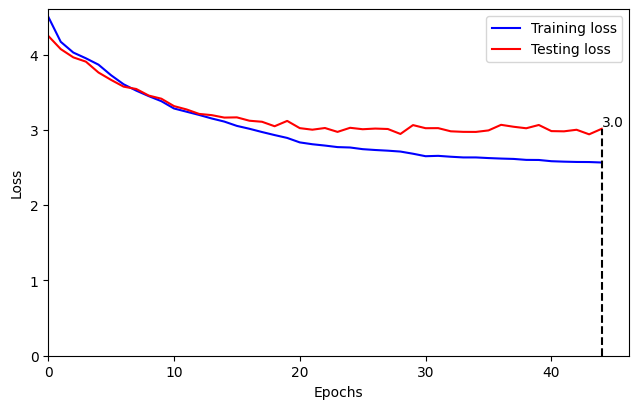

Traing epoch: 45   avg loss is: 2.5628943556831
Testing epoch: 45   avg testing loss is: 2.984879957181271
Testing on epoch: 45 has accuracy: top1: 27.89 top5: 65.87


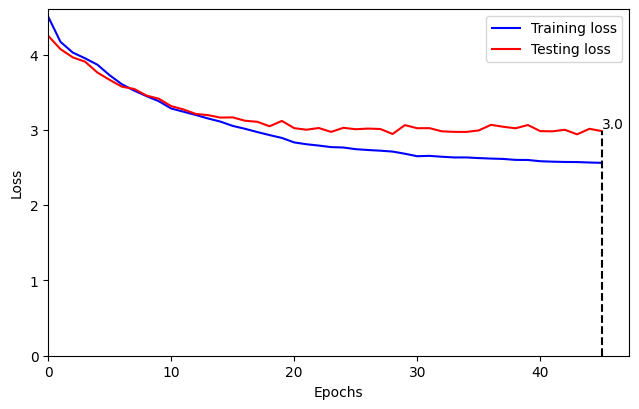

Traing epoch: 46   avg loss is: 2.566738981492713
Testing epoch: 46   avg testing loss is: 3.011899966688542
Testing on epoch: 46 has accuracy: top1: 26.58 top5: 64.66


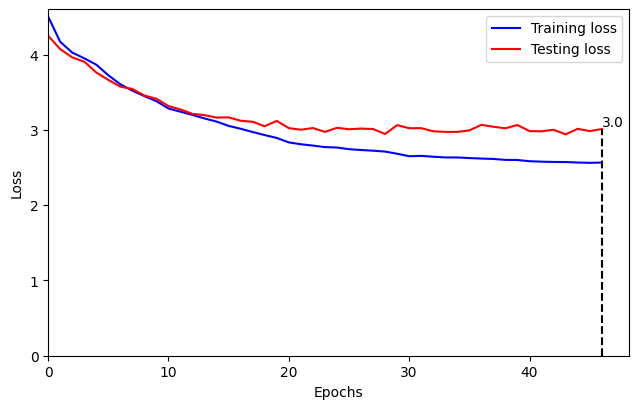

Traing epoch: 47   avg loss is: 2.5544185027354906
Testing epoch: 47   avg testing loss is: 3.0140617205717852
Testing on epoch: 47 has accuracy: top1: 26.57 top5: 64.42


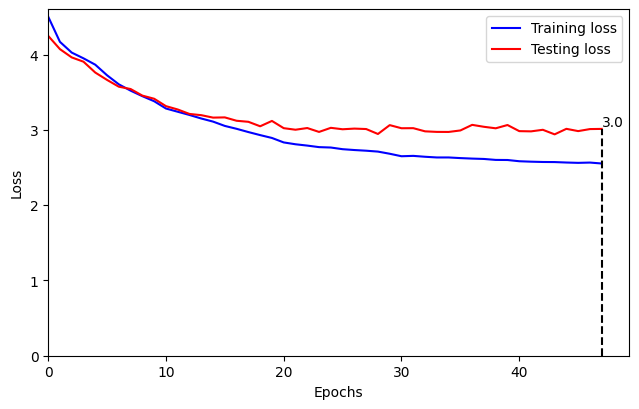

Traing epoch: 48   avg loss is: 2.554318302485789
Testing epoch: 48   avg testing loss is: 3.048839601772225
Testing on epoch: 48 has accuracy: top1: 26.12 top5: 63.33


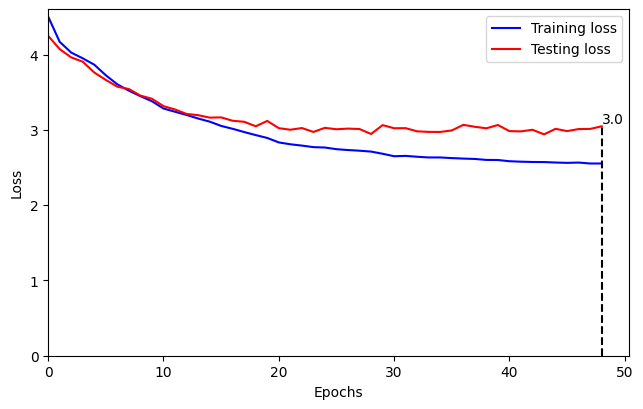

Traing epoch: 49   avg loss is: 2.554593975136594
Testing epoch: 49   avg testing loss is: 3.0380248577795297
Testing on epoch: 49 has accuracy: top1: 25.94 top5: 63.82


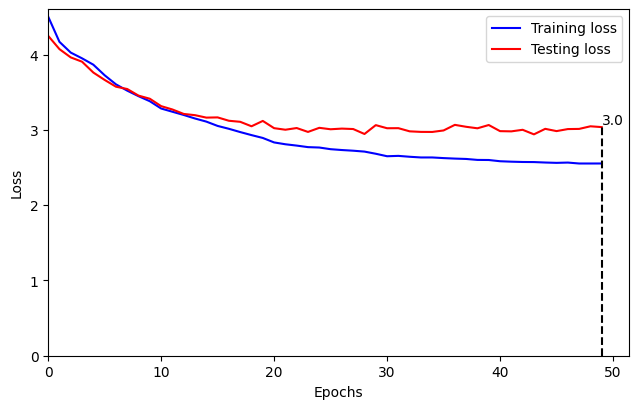

Traing epoch: 50   avg loss is: 2.551175369268038
Testing epoch: 50   avg testing loss is: 3.0409873549440567
Testing on epoch: 50 has accuracy: top1: 26.29 top5: 63.60


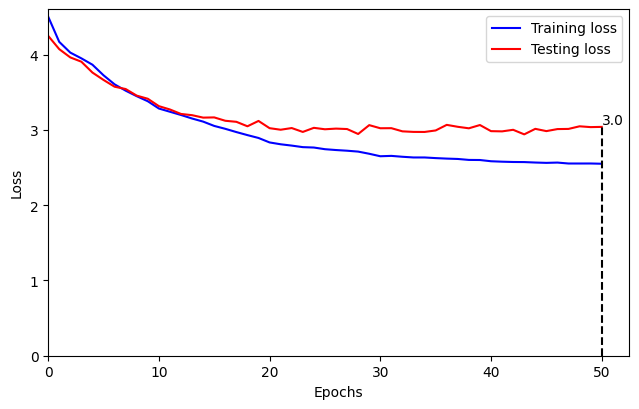

Traing epoch: 51   avg loss is: 2.54284264660683
Testing epoch: 51   avg testing loss is: 3.0073575305047435
Testing on epoch: 51 has accuracy: top1: 27.03 top5: 65.26


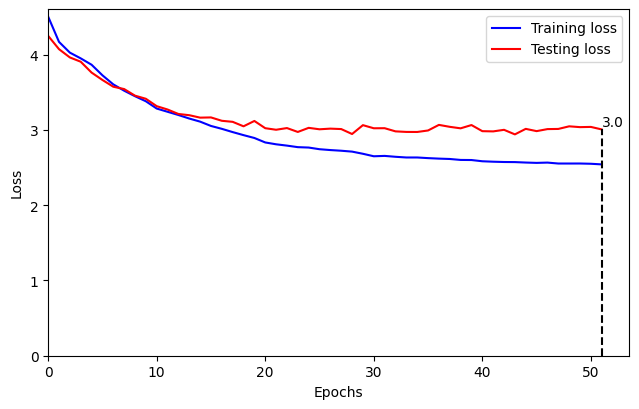

Traing epoch: 52   avg loss is: 2.539775185224389
Testing epoch: 52   avg testing loss is: 2.9742930685619697
Testing on epoch: 52 has accuracy: top1: 28.36 top5: 66.34


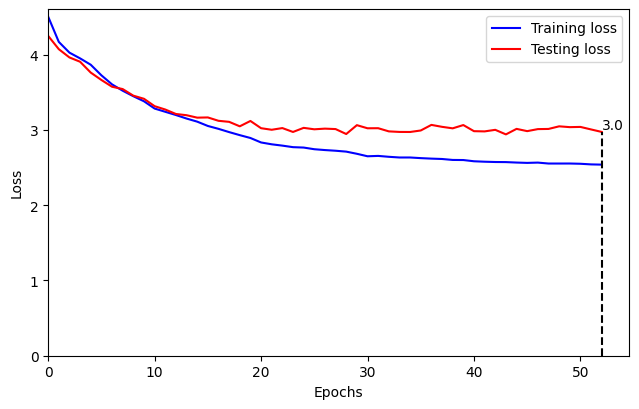

Traing epoch: 53   avg loss is: 2.5456780459032675
Testing epoch: 53   avg testing loss is: 2.9941543804893613
Testing on epoch: 53 has accuracy: top1: 27.48 top5: 65.85


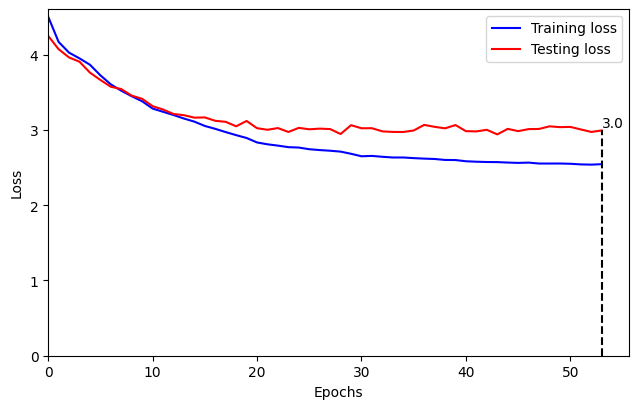

Traing epoch: 54   avg loss is: 2.541533832790471
Testing epoch: 54   avg testing loss is: 3.02229676365481
Testing on epoch: 54 has accuracy: top1: 26.60 top5: 64.50


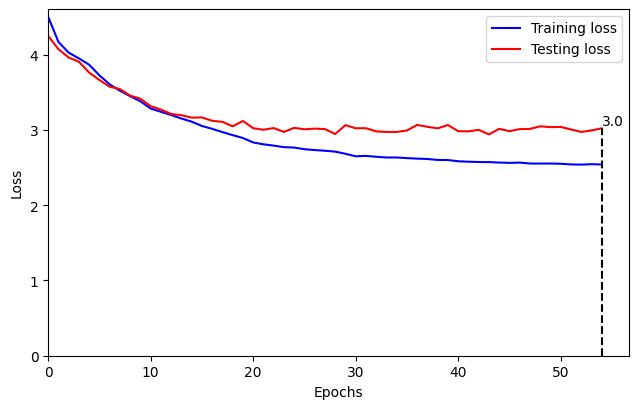

Traing epoch: 55   avg loss is: 2.543897940665066
Testing epoch: 55   avg testing loss is: 3.006694264129686
Testing on epoch: 55 has accuracy: top1: 27.36 top5: 65.22


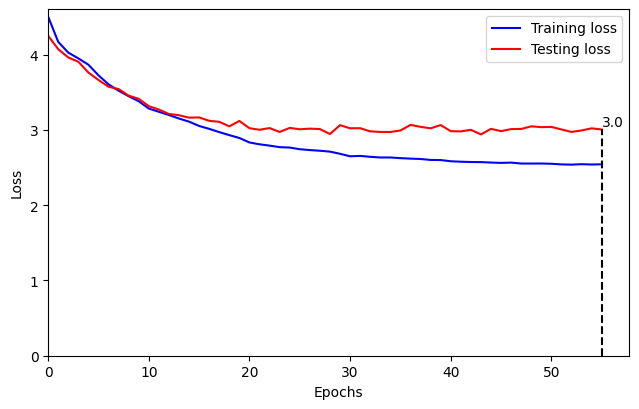

Traing epoch: 56   avg loss is: 2.5318727513321306
Testing epoch: 56   avg testing loss is: 3.020020014771791
Testing on epoch: 56 has accuracy: top1: 26.92 top5: 64.70


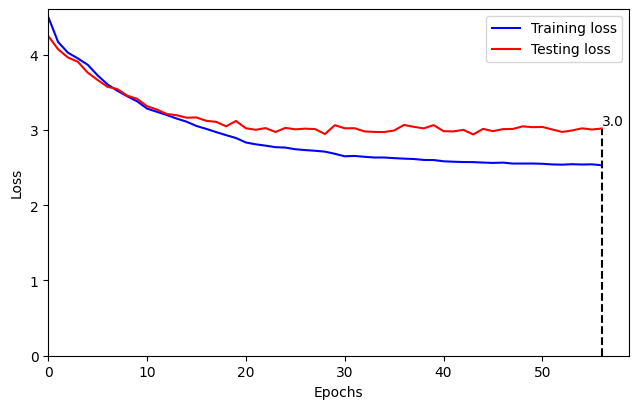

Traing epoch: 57   avg loss is: 2.5374773810891544
Testing epoch: 57   avg testing loss is: 3.0078112247205597
Testing on epoch: 57 has accuracy: top1: 27.17 top5: 65.22


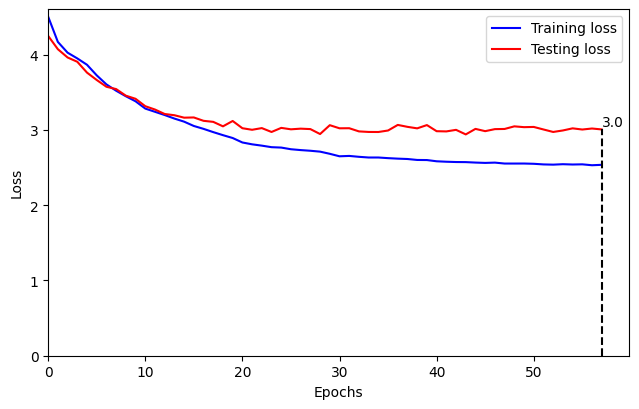

Traing epoch: 58   avg loss is: 2.5361903421685144
Testing epoch: 58   avg testing loss is: 3.0232404110216278
Testing on epoch: 58 has accuracy: top1: 26.62 top5: 64.54


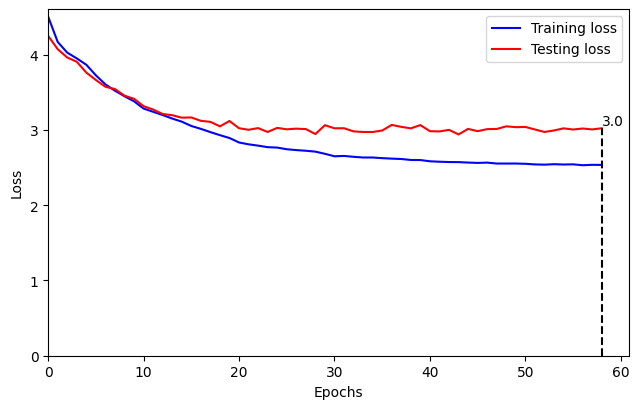

Traing epoch: 59   avg loss is: 2.535101296854954
Testing epoch: 59   avg testing loss is: 2.984606403428075
Testing on epoch: 59 has accuracy: top1: 27.64 top5: 66.37


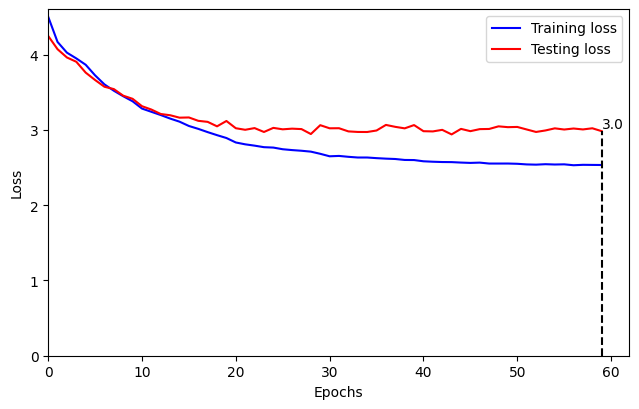

Traing epoch: 60   avg loss is: 2.5237358207462215
Testing epoch: 60   avg testing loss is: 2.99087068744909
Testing on epoch: 60 has accuracy: top1: 27.50 top5: 65.85


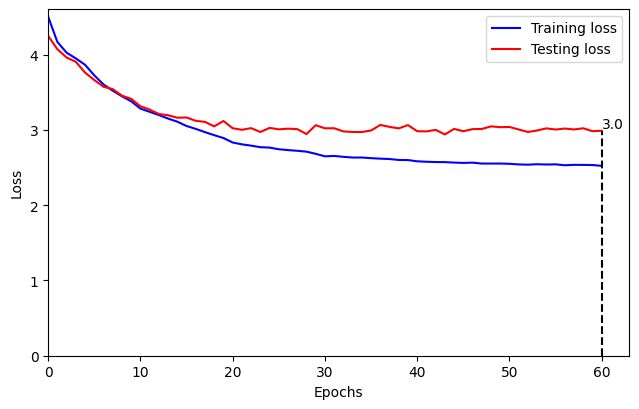

Traing epoch: 61   avg loss is: 2.5328649045372544
Testing epoch: 61   avg testing loss is: 3.0301829297965934
Testing on epoch: 61 has accuracy: top1: 26.49 top5: 64.48


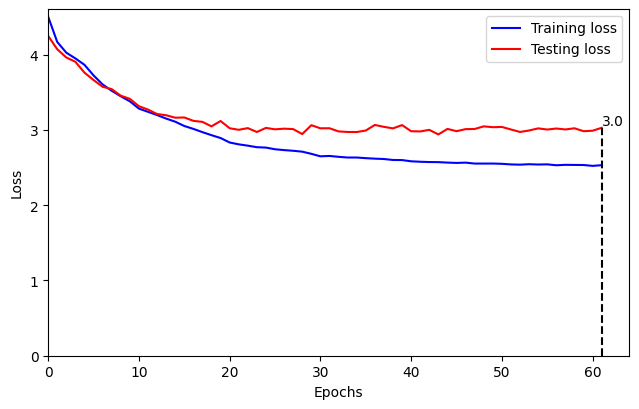

Traing epoch: 62   avg loss is: 2.5286442058093073
Testing epoch: 62   avg testing loss is: 3.022154990757737
Testing on epoch: 62 has accuracy: top1: 26.82 top5: 64.77


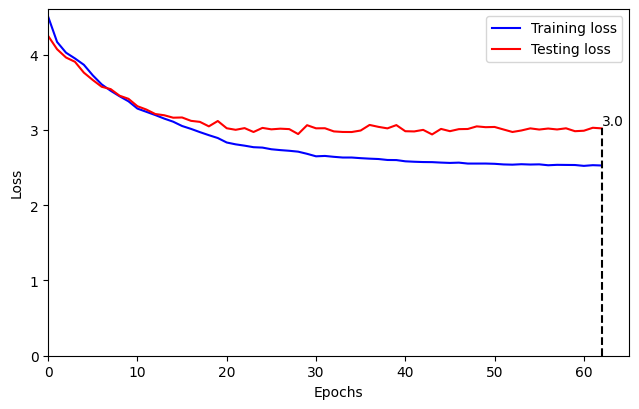

Traing epoch: 63   avg loss is: 2.528521844986774
Testing epoch: 63   avg testing loss is: 3.0209876354609695
Testing on epoch: 63 has accuracy: top1: 26.94 top5: 64.77


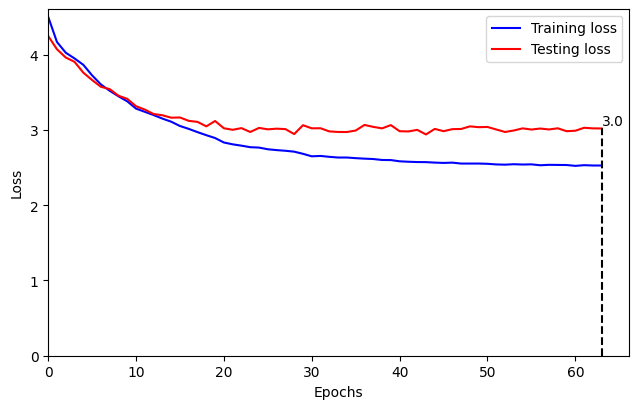

Traing epoch: 64   avg loss is: 2.5196004080839183
Testing epoch: 64   avg testing loss is: 3.0452587470830044
Testing on epoch: 64 has accuracy: top1: 26.27 top5: 63.82


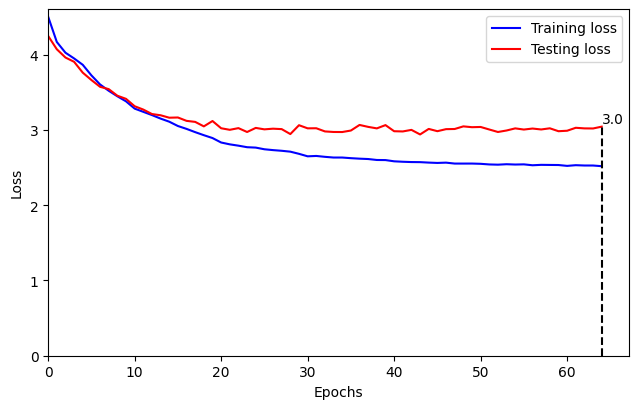

Traing epoch: 65   avg loss is: 2.5225764950450396
Testing epoch: 65   avg testing loss is: 3.0221082406623343
Testing on epoch: 65 has accuracy: top1: 26.80 top5: 64.58


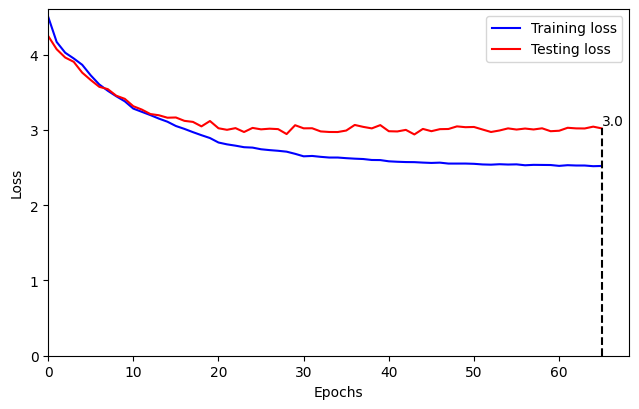

Traing epoch: 66   avg loss is: 2.520869691164888
Testing epoch: 66   avg testing loss is: 3.0186348525905906
Testing on epoch: 66 has accuracy: top1: 26.86 top5: 64.79


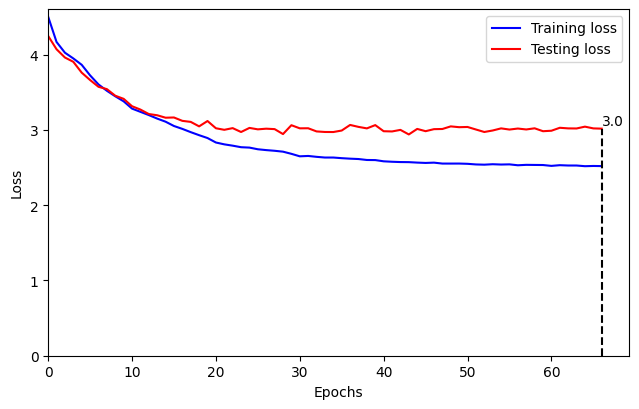

Traing epoch: 67   avg loss is: 2.5272721903664723
Testing epoch: 67   avg testing loss is: 3.0168062719600592
Testing on epoch: 67 has accuracy: top1: 26.99 top5: 64.76


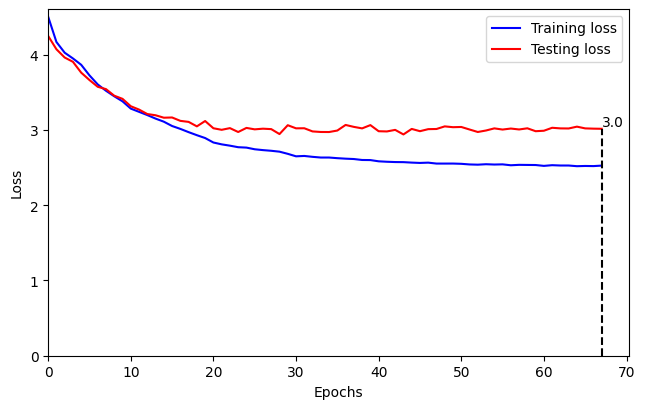

Traing epoch: 68   avg loss is: 2.5220968916970476
Testing epoch: 68   avg testing loss is: 3.055081876267525
Testing on epoch: 68 has accuracy: top1: 25.98 top5: 63.37


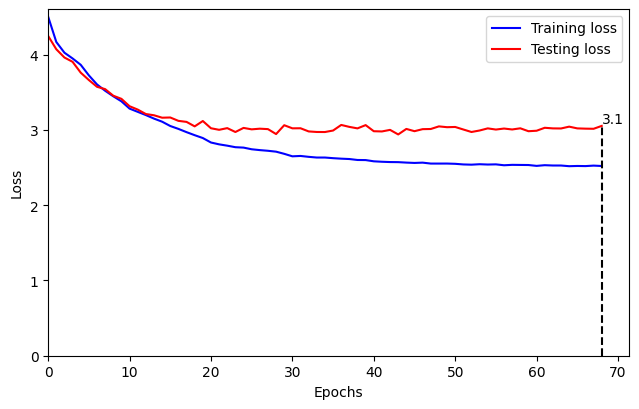

Traing epoch: 69   avg loss is: 2.521302891712563
Testing epoch: 69   avg testing loss is: 3.0163898980506114
Testing on epoch: 69 has accuracy: top1: 26.94 top5: 64.58


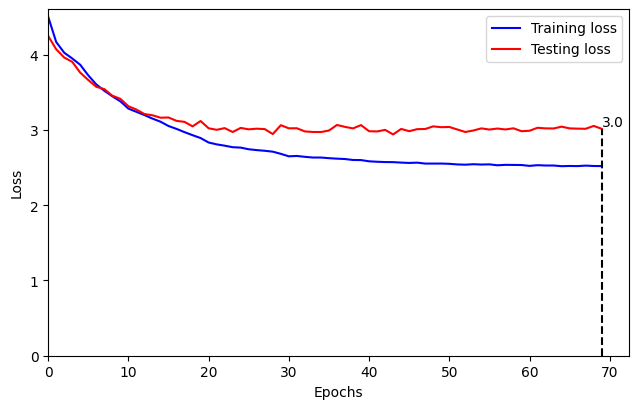

In [4]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png',mode='vertical'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/test/'

        self.imgtype=imgtype
        self.mode = mode
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model_'+self.mode+'_aug_16'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)

    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)


            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()


        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))
        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)


        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)

    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')


    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.figure(figsize=(7.5, 4.5))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #plt.title('Training and Testing Losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/content/loss_plot.svg", format="svg", dpi=300)


        plt.show()


    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):

            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res


if __name__ == '__main__':

    modelist = ['vertical','horizontal']
    mode = modelist[1]

    mod = DeepWriter_Train(dataset='CERUG-EN',mode=mode)
    mod.train_loops(0,70)